# Project - 2 :  Employee Attrition Prediction, based on Employee previous records.

### Objective : 
    - To explore the dataset and make a machine learning model, that predicts the attrition of the employee.
    
### Dataset :
    - Employee_Performance.csv consists of employees performance metrics for previous employees.

### Loading Required Libraries

In [1]:
# Data Manipulation Library
import pandas as pd

# Data Visualisation Library
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Data preprocessing Library
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, scale

#Data splitting Library 
from sklearn.model_selection import train_test_split

#Required Libraries for Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm

#Required Library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Required Libraries for model testing
from sklearn.metrics import accuracy_score, confusion_matrix ,recall_score, average_precision_score, classification_report

### Loading Data 

In [2]:
empData = pd.read_csv('Employee_Performance.csv')

### Basic Data Overview

    - Entries : 1200 
    - Columns : 28
    - Out of 28 columns 9 are of object type, remaining 19 are of int64 type
    - There is no column with null data

In [3]:
empData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

### Analysis
    
    - Analysis of numerical data shows that there is no significant relation between any two features.
    - Only few columns shows positive relationship.

In [4]:
empData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


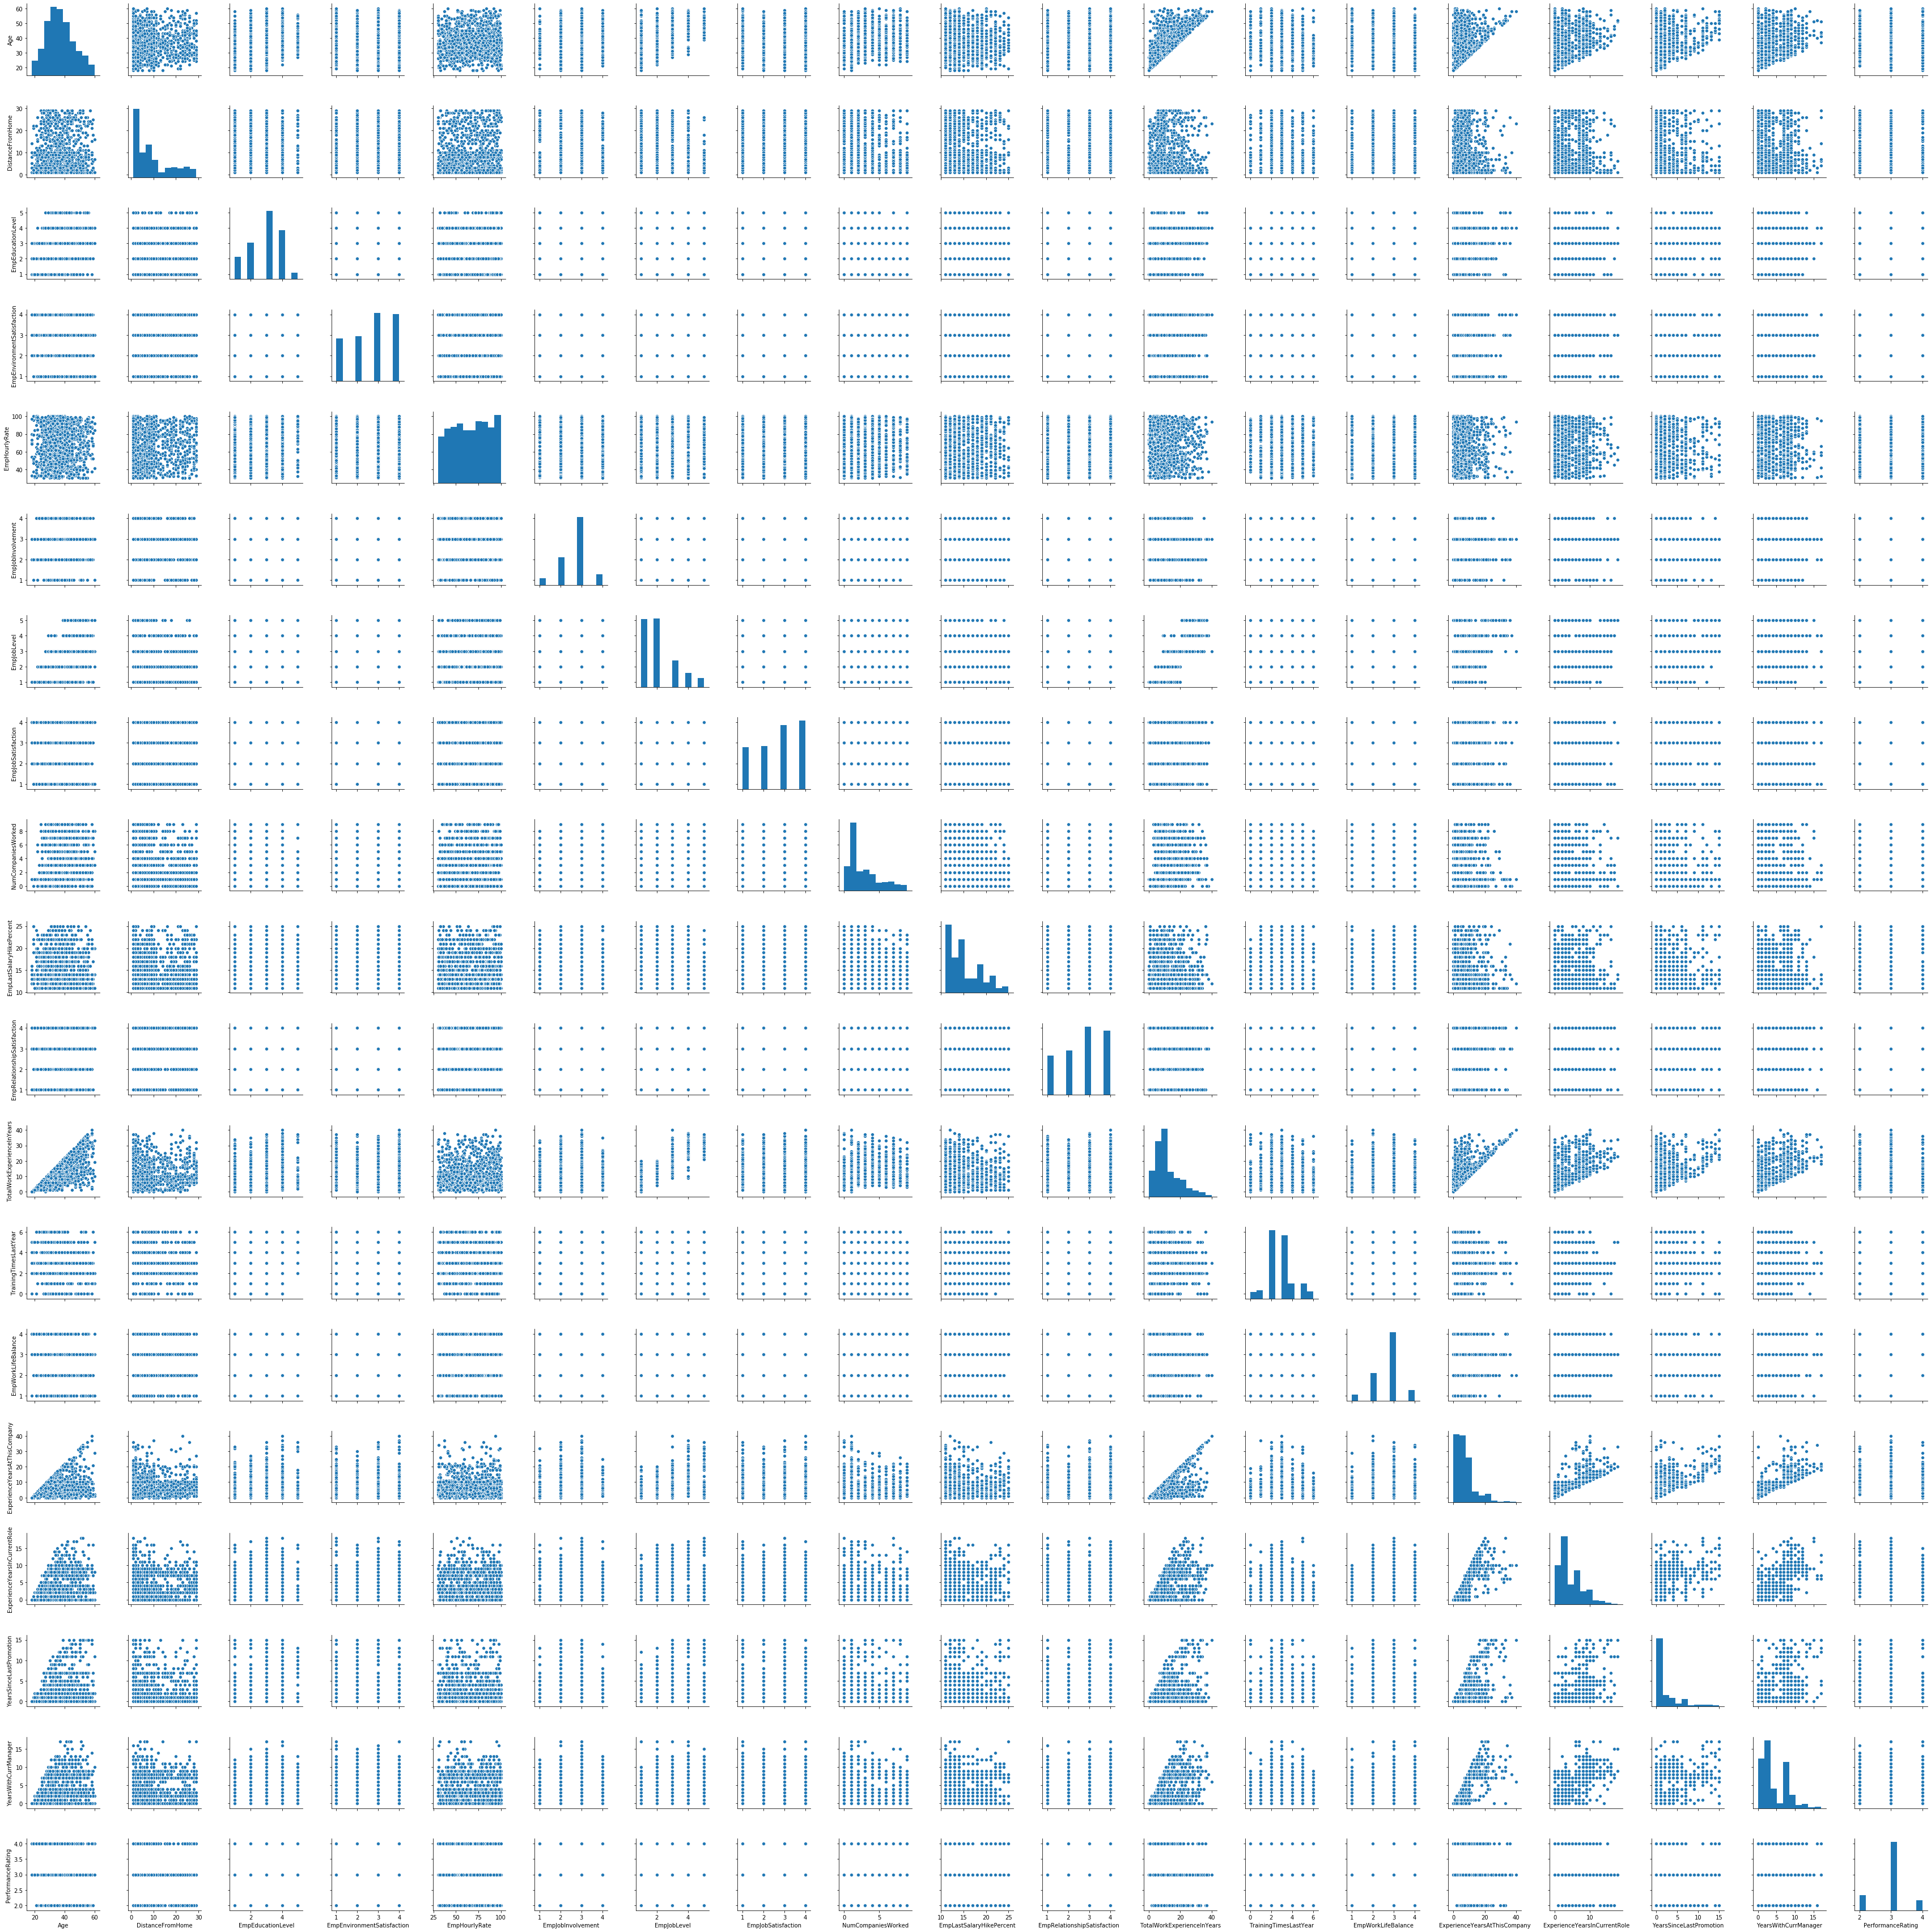

In [5]:
sns.pairplot(empData)

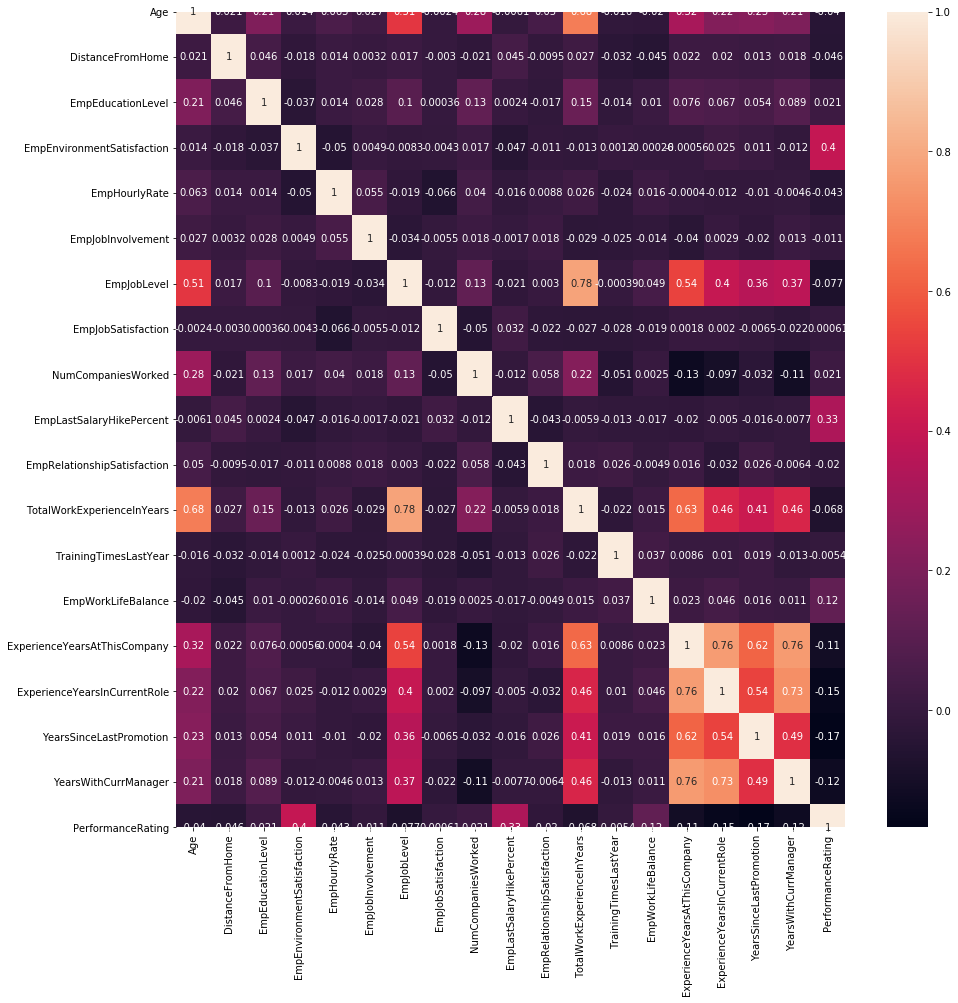

In [6]:
_, axes=plt.subplots(figsize=(15,15))
sns.heatmap(empData.corr(),ax=axes, annot=True)

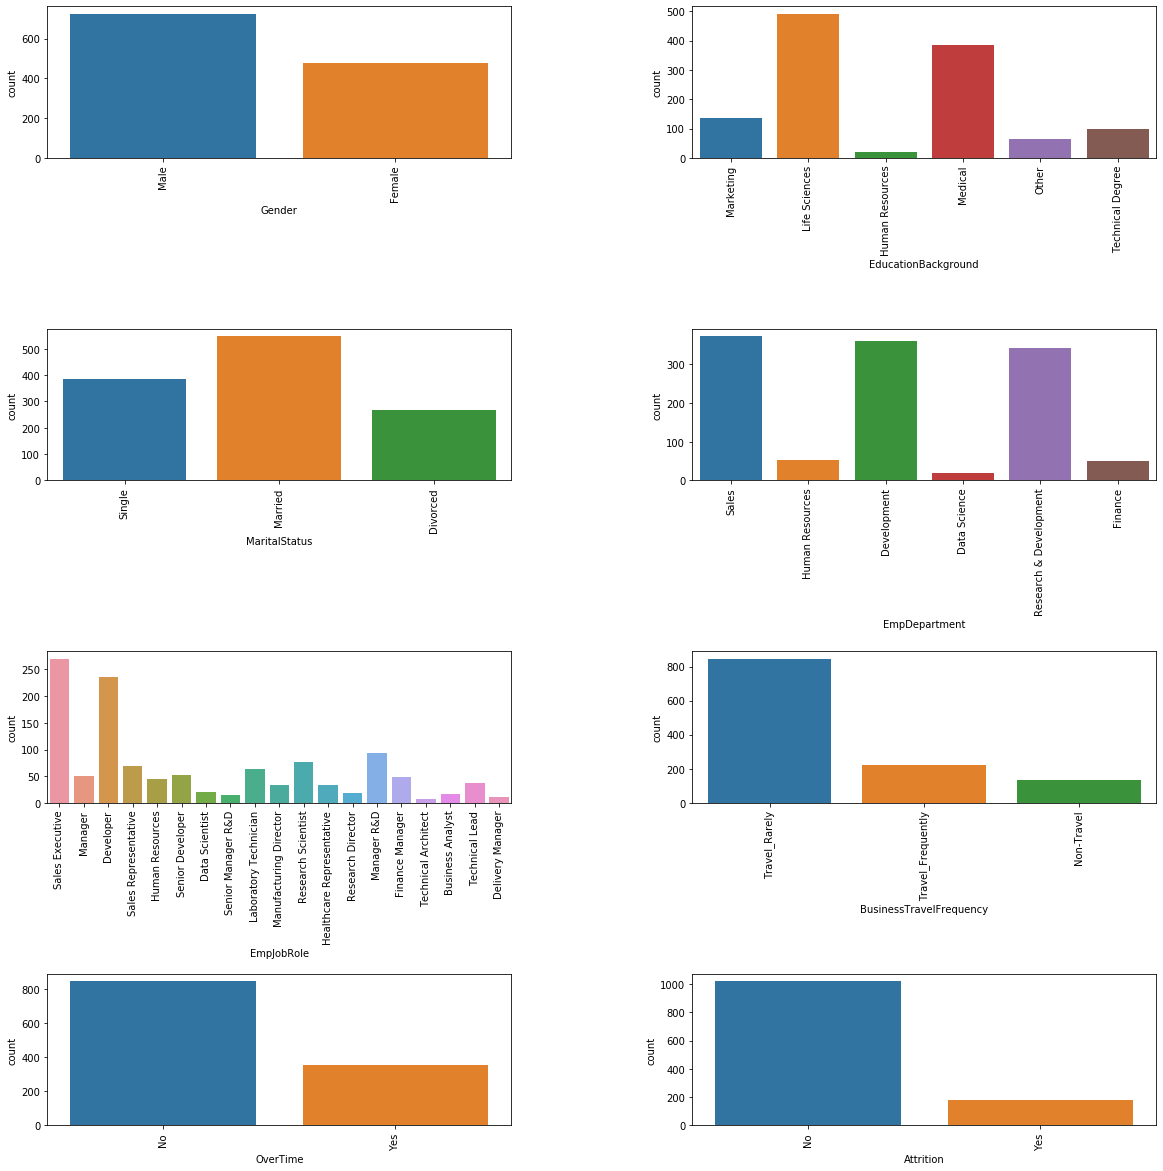

In [7]:
catCols = ['Gender', 'EducationBackground', 'MaritalStatus','EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 
           'OverTime', 'Attrition']
fig, axs = plt.subplots(4,2, figsize=(20,20))

fig.tight_layout(pad=15.0)
for i in range(4):
    for j in range(2):
        chart = sns.countplot(empData[catCols[2*i+j]], ax=axs[i][j])
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
        

### Department wise performances
    
    - Development Department has average performance rating higher than all other departments.

In [8]:
depData = pd.DataFrame(empData.groupby('EmpDepartment').mean()['PerformanceRating'])
depData.reset_index(inplace=True)
depData

,EmpDepartment,PerformanceRating
0,Data Science,3.050000
1,Development,3.085873
2,Finance,2.775510
3,Human Resources,2.925926
4,Research & Development,2.921283
5,Sales,2.860590


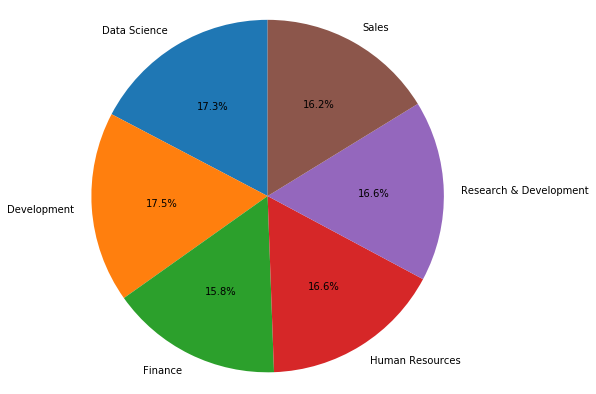

In [9]:
_ , axs = plt.subplots(figsize=(7,7))
axs.pie(depData['PerformanceRating'], labels=depData['EmpDepartment'], autopct='%1.1f%%',
        shadow=False, startangle=90)
axs.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Top 3 Important Factors affecting employee performance

In [10]:
cols = ['BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','PerformanceRating']

In [11]:
lowPerformingEmp = empData[empData['PerformanceRating']<3][cols]
lowPerformingEmp.head(5)

,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
132,Travel_Rarely,1,4,1,46,2,3,3,5,No,11,3,17,2,1,14,1,11,7,2
162,Travel_Rarely,8,2,2,73,4,3,1,0,Yes,12,3,9,4,2,8,7,1,7,2
164,Travel_Rarely,8,1,2,94,1,1,1,1,No,15,1,4,3,2,4,3,1,1,2
165,Travel_Rarely,6,3,1,97,2,2,3,2,No,13,4,19,0,3,2,2,2,2,2
169,Travel_Rarely,2,4,1,47,3,2,4,0,No,18,2,4,2,3,3,2,2,2,2


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


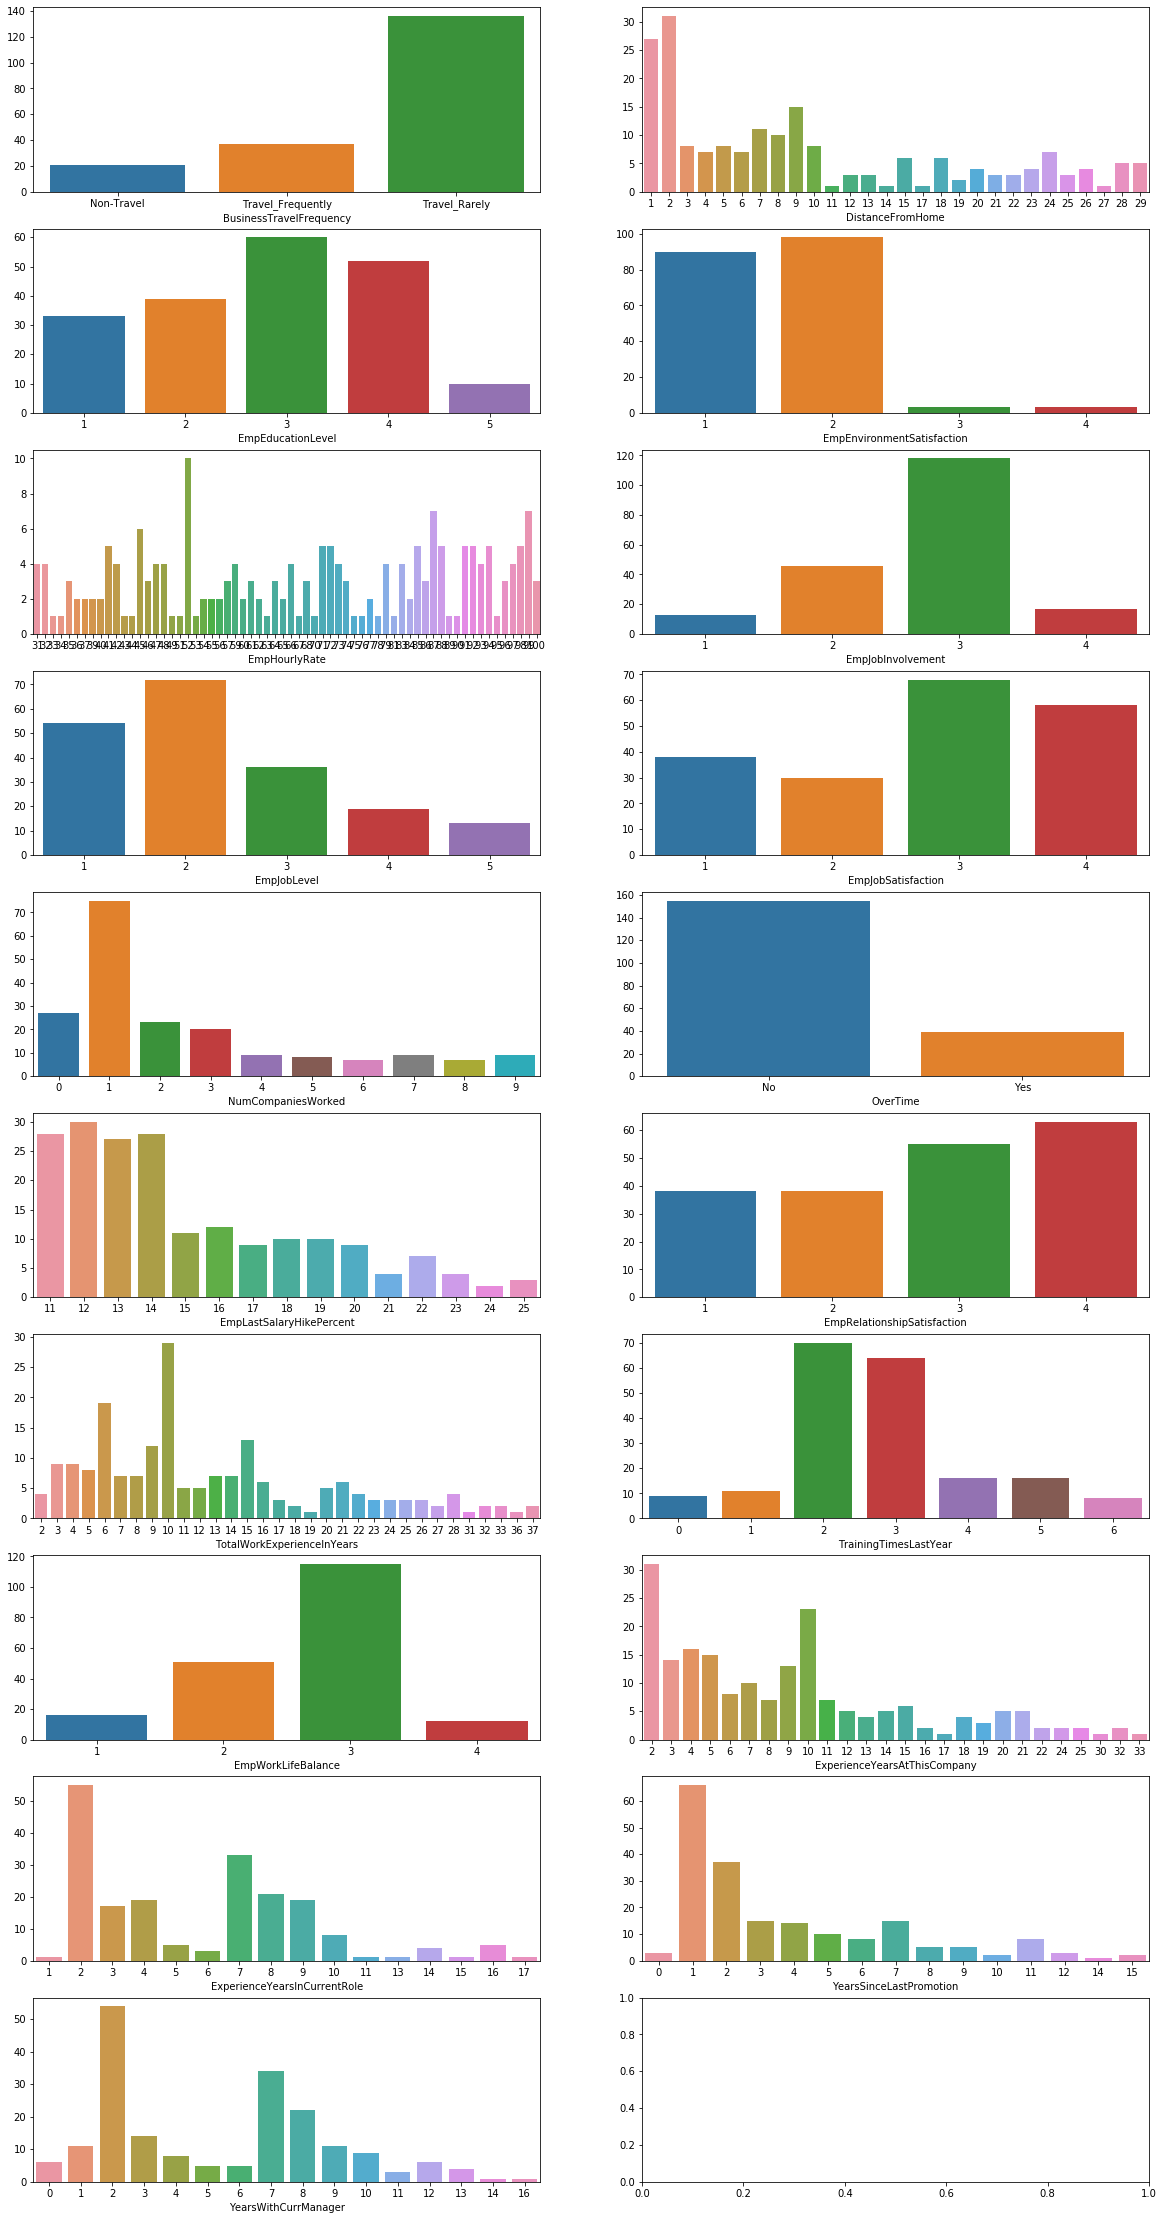

In [12]:
i, j = 0, 0
fig, axs = plt.subplots(10,2, figsize = (20,40))
fig.tight_layout(pad=30.0)
for index in range(len(cols)-1):
    data=pd.DataFrame(lowPerformingEmp.groupby(cols[index]).count()['PerformanceRating'])
    data.reset_index(inplace=True)
    chart = sns.barplot(x=cols[index], y='PerformanceRating',data=data, ax = axs[i][j])
    chart.set(xlabel=cols[index], ylabel=None)
    j=j+1
    if j>1: 
        j=0
        i=i+1

### Preparing Data to Train Model


In [13]:
for column in empData.select_dtypes('object'):
    empData[column]=empData[column].astype('category')
empData.dtypes

EmpNumber                       category
Age                                int64
Gender                          category
EducationBackground             category
MaritalStatus                   category
EmpDepartment                   category
EmpJobRole                      category
BusinessTravelFrequency         category
DistanceFromHome                   int64
EmpEducationLevel                  int64
EmpEnvironmentSatisfaction         int64
EmpHourlyRate                      int64
EmpJobInvolvement                  int64
EmpJobLevel                        int64
EmpJobSatisfaction                 int64
NumCompaniesWorked                 int64
OverTime                        category
EmpLastSalaryHikePercent           int64
EmpRelationshipSatisfaction        int64
TotalWorkExperienceInYears         int64
TrainingTimesLastYear              int64
EmpWorkLifeBalance                 int64
ExperienceYearsAtThisCompany       int64
ExperienceYearsInCurrentRole       int64
YearsSinceLastPr

In [14]:
#Splitting Target variable and Attributes
X_cols=set(empData.columns)
X_cols.remove('Attrition')
X_data= empData[X_cols]
y_labels=empData['Attrition']

In [15]:
y_labels

0        No
1        No
2        No
3        No
4        No
       ... 
1195     No
1196     No
1197     No
1198     No
1199    Yes
Name: Attrition, Length: 1200, dtype: category
Categories (2, object): [No, Yes]

In [16]:
#Performing One hot Encoding on both target and attributes
tempDf= X_data.select_dtypes('category')
tempDf= tempDf.copy()
X_data=X_data.drop(tempDf.columns,axis=1)
le = LabelEncoder()
for column in tempDf.select_dtypes('category'):
    tempDf[column]=le.fit_transform(tempDf[column])
tempDf=pd.get_dummies(tempDf, columns=tempDf.columns)
tempDf.shape

(1200, 1241)

In [17]:
X_dataFinal=pd.concat([X_data,tempDf],axis=1)
X_dataFinal.head(5)

,Age,EmpWorkLifeBalance,EmpEducationLevel,NumCompaniesWorked,EmpHourlyRate,PerformanceRating,DistanceFromHome,TrainingTimesLastYear,YearsWithCurrManager,EmpLastSalaryHikePercent,...,EmpJobRole_9,EmpJobRole_10,EmpJobRole_11,EmpJobRole_12,EmpJobRole_13,EmpJobRole_14,EmpJobRole_15,EmpJobRole_16,EmpJobRole_17,EmpJobRole_18
0,32,2,3,1,55,3,10,2,8,12,...,0,0,0,0,1,0,0,0,0,0
1,47,3,4,2,42,3,14,2,7,12,...,0,0,0,0,1,0,0,0,0,0
2,40,3,4,5,48,4,5,2,12,21,...,0,0,0,0,1,0,0,0,0,0
3,41,2,4,3,73,3,10,2,6,15,...,0,0,0,0,0,0,0,0,0,0
4,60,3,4,8,84,3,16,1,2,14,...,0,0,0,0,1,0,0,0,0,0


### Train and Test Data Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_dataFinal, y_labels, test_size = 0.3, random_state = 10)

In [19]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

### Model 1 : Naive Bayes Classifier

In [20]:
#Creating an instance of Gaussian NB Classifier and fitting a model across train and test data1

model_NB = GaussianNB()
model_NB.fit(X_train_scaled, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
#Predicting y values using X_test data

y_pred = model_NB.predict(X_test_scaled)

In [22]:
#Calculating Accuracy Count using y_test and y_pred data values

NB_Accuracy_Count = accuracy_score(y_test, y_pred, normalize=False)

print("off "+str(len(y_pred))+" test records,"+str(NB_Accuracy_Count)+" predictions are correct")

off 360 test records,306 predictions are correct


In [23]:
#Calculating Accuracy Score in percent using y_test and y_pred data values

NB_Accuracy_Score = accuracy_score(y_test, y_pred, normalize=True)

print("Accuracy = "+str(NB_Accuracy_Score*100))

Accuracy = 85.0


In [24]:
# Displaying confusion matrix

confusion_matrix(y_test,y_pred)

array([[306,   0],
       [ 54,   0]], dtype=int64)

In [25]:
# Displaying classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      1.00      0.92       306
         Yes       0.00      0.00      0.00        54

    accuracy                           0.85       360
   macro avg       0.42      0.50      0.46       360
weighted avg       0.72      0.85      0.78       360



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Model 2 : Decision Tree Classifier

In [26]:
#Creating instance of Decision Tree Classifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)

#Fitting train dataset to decision tree
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [27]:
#Printing accuracy score for both training set and test set

print('Training Accuracy : '+str(dTree.score(X_train, y_train)*100))
print('Test Accuracy : '+str(dTree.score(X_test, y_test)*100))

Training Accuracy : 100.0
Test Accuracy : 82.77777777777777


### Performing Regularization

In [28]:
#Creating instance of Decision Tree Classifier with max_depth=3 so as to avoid overfitting
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)

#Printing accuracy score for both training set and test set
print('Training Accuracy : '+str(dTreeR.score(X_train, y_train)*100))
print('Test Accuracy : '+str(dTreeR.score(X_test, y_test)*100))

Training Accuracy : 87.02380952380952
Test Accuracy : 84.72222222222221


In [29]:
# Displaying classification report
y_predict = dTreeR.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          No       0.86      0.98      0.92       306
         Yes       0.44      0.07      0.13        54

    accuracy                           0.85       360
   macro avg       0.65      0.53      0.52       360
weighted avg       0.80      0.85      0.80       360



# Summary

    - Two models have been tried Naive Bayes Classifier and Decission Tree Regressor
    - The Decission Tree Regressor proves to perform better as the data is biased with more values of No.
    - On performing regularization of model the perform of Decission Tree is much better. 
    
    - Performance parameters:
        1. Decision Trees
            - Accuracy  : 87.02
            - Precision : For 0(No): 0.86, 1(Yes): 0.98
            - Recall    : For 0(No): 0.44, 1(Yes): 0.07
        2. Naive Bayes
            - Accuracy  : 85
            - Precision : For 0(No): 0.85, 1(Yes): 1.00
            - Recall    : For 0(No): 0.00, 1(Yes): 0.00
            
### Note : 

1. The above data clearly shows that naive bayes overfits on data for entry 'No'. But regularized Decission Tree works better on Yes too.

2. The model can be further improved by hyper-parameter tuning.

